## BIDIRECTIONAL LSTM

This notebook contains the implementation of the Bidirectional LSTM model.

<b>Importing libraries</b>

In [2]:
import warnings
import sys
import os

warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))
sys.path.append(parent_dir)

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
from src.main.models.bidirLSTM import BidirectionalLSTM
from src.main.pipeline.functions import clean_text, remove_contractions, stop_words_removal, tokenize
from src.main.utilities.utils import get_dataset, load_pretrained_embeddings, split_train_val_test, embedding_matrix_statistics
import keras as K
from config.config import LOGS_PATH
import random

<b>Define model and pipeline, apply pipeline to dataset</b>

In [4]:
bidirLSTM = BidirectionalLSTM(pretrained_embeddings="glove")
bidirLSTM.pipeline = [remove_contractions, clean_text, stop_words_removal, tokenize]
inputs, targets = get_dataset(one_hot=True)
inputs = bidirLSTM.run_pipeline(inputs, save=False)

# stratified train test split
x_train, x_val, x_test, y_train, y_val, y_test = split_train_val_test(inputs, targets, validation_size=0.2, test_size=0.1)

Pipeline started
Pipeline execution time: 0:00:23.260747
Creating embedding matrix...


<b>Load pretrained embeddings</b>

In [5]:
pretrained_embeddings = load_pretrained_embeddings("glove")
find_ratio, unmatched_words = embedding_matrix_statistics(pretrained_embeddings)

print("Find ratio:", find_ratio)
print("Unmatched tokens count:", len(unmatched_words))
print("Unmatched words examples:\n" + str(random.sample(unmatched_words, 10)))
print(str(random.sample(unmatched_words, 10)))

Find ratio: 0.8661407929857
Unmatched tokens count: 8977
Unmatched words examples:
['yourtango', 'tatums', 'joneshas', 'devonte', 'walkrunfly', 'dirgha', 'advertizements', 'dpaf', 'mudbound', 'snickerdoodle']
['tithetrans', 'trumps1styearathogwarts', 'smoketel', 'zohydro', 'shanghaiist', 'pelosis', 'diversitya', 'spatting', 'goosenberg', 'peached']


<b>Model grid search</b>

In [6]:
callbacks = [
    K.callbacks.EarlyStopping(monitor='val_f1_macro', patience=2, mode='max', restore_best_weights=True),
    K.callbacks.TensorBoard(LOGS_PATH.format(repr(bidirLSTM)))
]

best_hps = bidirLSTM.grid_search(x_train, y_train, x_val, y_val, callbacks=callbacks, n_iter=50)

Reloading Tuner from /home/f.decastelli/mensa_martiri/HLT-News-Category/results/BidirectionalLSTM/BidirectionalLSTM/tuner0.json


<b>Model evaluation</b>

In [ ]:
%load_ext tensorboard
%tensorboard --logdir "{LOGS_PATH.format(repr(bidirLSTM))}" --host localhost

337/337 ━━━━━━━━━━━━━━━━━━━━ 35s 105ms/step


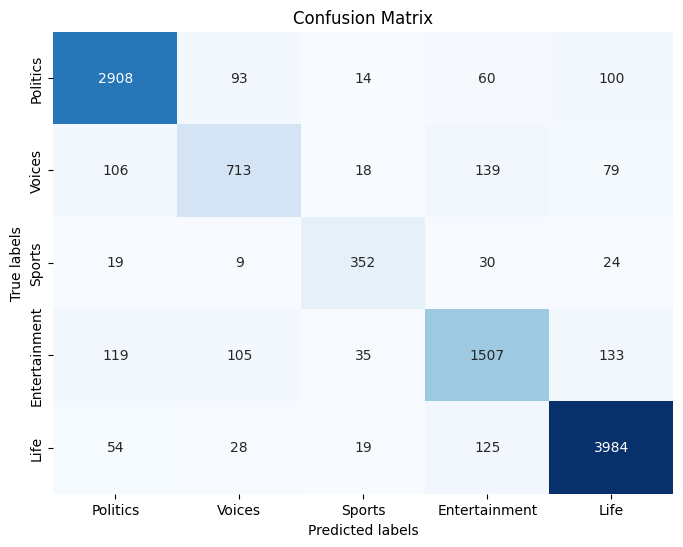

In [16]:
bidirLSTM.save_results(x_test, y_test)

In [17]:
bidirLSTM.save_model()

<b>Top 5 experiments</b>

In [18]:
for res in BidirectionalLSTM.get_top_experiments("BidirectionalLSTM", 5):
    print("Hyperparameters:", res[0])
    print("F1:", res[1])
    print()

Hyperparameters: {'lstm_units_1': 95, 'lstm_units_2': 40, 'dropout1': 0.3, 'dropout2': 0.05, 'dense1': 45, 'dense2': 20, 'learning_rate': 0.005, 'epochs': 20, 'batch_size': 1024}
F1: 0.8380535244941711

Hyperparameters: {'lstm_units_1': 95, 'lstm_units_2': 44, 'dropout1': 0.25, 'dropout2': 0.05, 'dense1': 45, 'dense2': 20, 'learning_rate': 0.005, 'epochs': 20, 'batch_size': 1024}
F1: 0.8369098901748657

Hyperparameters: {'lstm_units_1': 110, 'lstm_units_2': 52, 'dropout1': 0.25, 'dropout2': 0.15, 'dense1': 45, 'dense2': 20, 'learning_rate': 0.005, 'epochs': 20, 'batch_size': 1024}
F1: 0.8368542194366455

Hyperparameters: {'lstm_units_1': 90, 'lstm_units_2': 56, 'dropout1': 0.2, 'dropout2': 0.15, 'dense1': 45, 'dense2': 15, 'learning_rate': 0.005, 'epochs': 20, 'batch_size': 1024}
F1: 0.8364543914794922

Hyperparameters: {'lstm_units_1': 100, 'lstm_units_2': 56, 'dropout1': 0.25, 'dropout2': 0.1, 'dense1': 40, 'dense2': 17, 'learning_rate': 0.005, 'epochs': 20, 'batch_size': 1024}
F1: 0